In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [2]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
from scipy.optimize import curve_fit, minimize

nside = 128
ells = np.arange(3*nside)


Populating the interactive namespace from numpy and matplotlib


In [3]:
%autoreload

# unrelated: is there a relation between the standard deviation of the $\beta$ map and the value of $\gamma$ that we can use to lift the realisation dependence of the model through the amplitude?

In [4]:
gammas = np.linspace(-4,-2.01, 100)
std = np.zeros_like(gammas)
std_big = np.zeros((100,100))

In [5]:
start=time.time()
for j in range(100):
    for i in range(len(gammas)):
        bcls = ff.powerlaw(ells, 1, gammas[i])
        beta_map = hp.synfast(bcls, nside, new=True, verbose=False)
        std[i] = np.std(beta_map)
    std_big[j] = std
print(time.time()-start)

330.580283164978


In [7]:
std_big[0].shape
mean = np.mean(std_big,0)

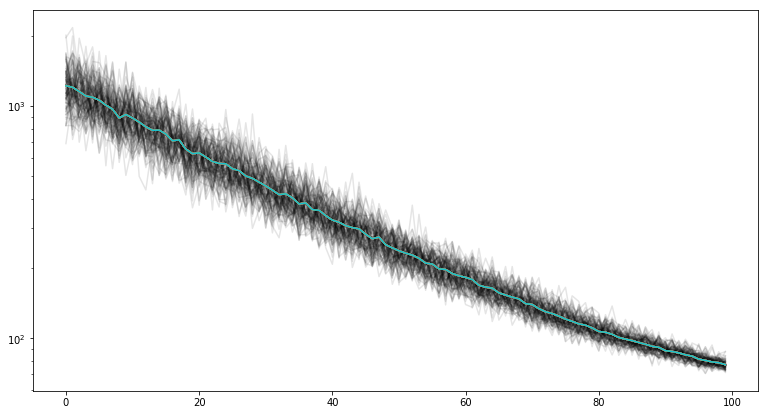

In [10]:
figure(figsize=(13,7))
for i in range(100):
    semilogy(std_big[i], 'k', alpha=0.1)
    semilogy(mean)

In [12]:
start=time.time()
param, cov = curve_fit(lambda t,a,b: a*numpy.exp(b*t),  gammas,  mean)
print(time.time()-start)

0.0030400753021240234


In [23]:
a = param[0]
b = param[1]
print(param)

[ 2.07994206 -1.59170336]


Text(0, 0.5, 'std of beta map')

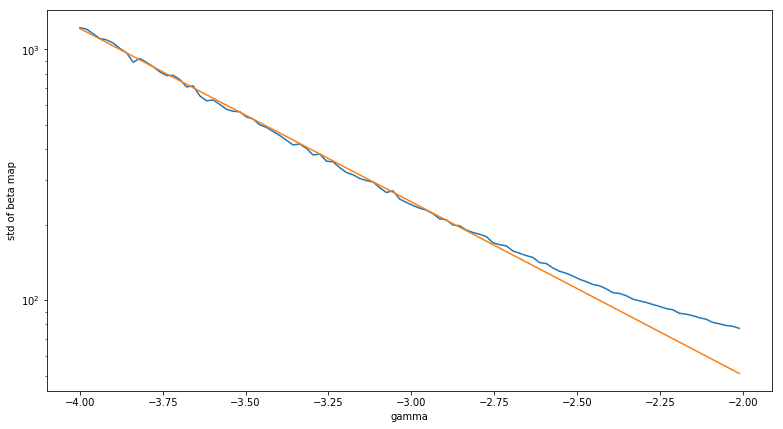

In [15]:
figure(figsize=(13,7))
semilogy(gammas, mean)
semilogy(gammas, a*np.exp(b*gammas))
xlabel('gamma')
ylabel('std of beta map')

In [27]:
start=time.time()
param_1, cov_1 = curve_fit(lambda t,a,b,c: a*(-t)**b*np.exp(c*t),  gammas,  mean)
print(time.time()-start)

0.006986856460571289


In [28]:
param_1

array([ 4.16190627, -3.28619789, -2.56282892])

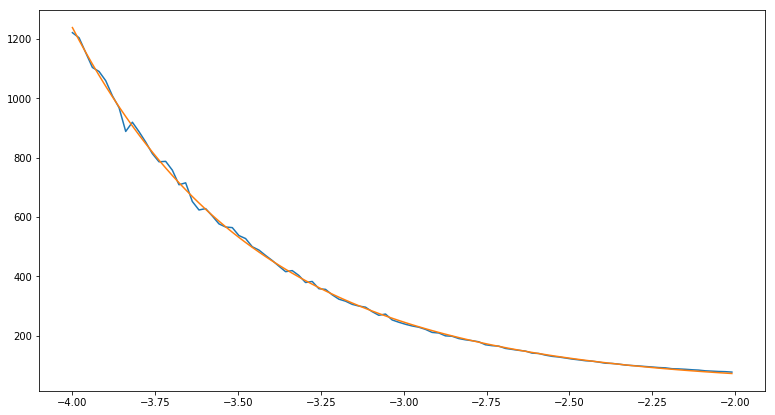

In [30]:
figure(figsize=(13,7))
plot(gammas, mean)
plot(gammas, param_1[0]*(-gammas)**param_1[1]*np.exp(param_1[2]*gammas))

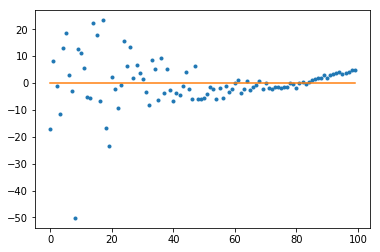

In [35]:
plot(mean - param_1[0]*(-gammas)**param_1[1]*np.exp(param_1[2]*gammas), '.')
plot(np.zeros(100))

In [36]:
n = 50

In [37]:
%autoreload

55.279266119003296


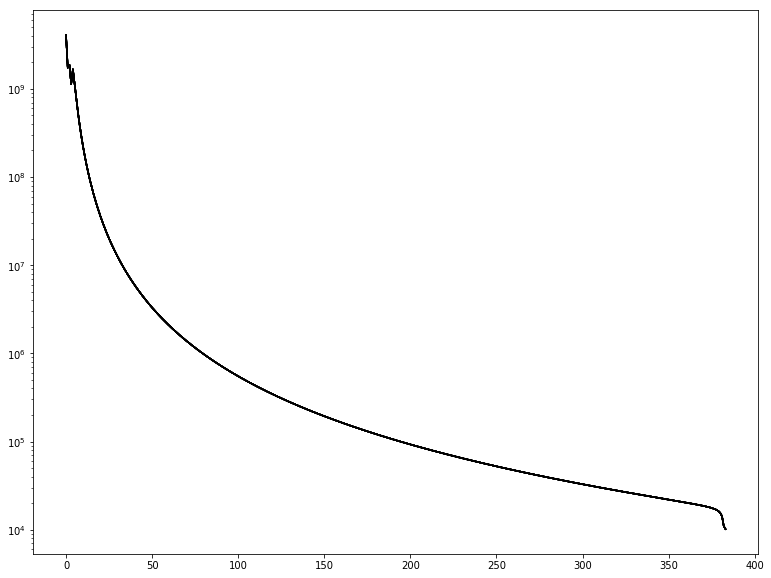

In [38]:
#test multiple realisations of the model to see how much it varies
start=time.time()
figure(figsize=(13,10))
for i in range(n):
    semilogy(ff.auto1x1(30e9), 'k',alpha=0.2)
print(time.time()-start)

3.414062738418579


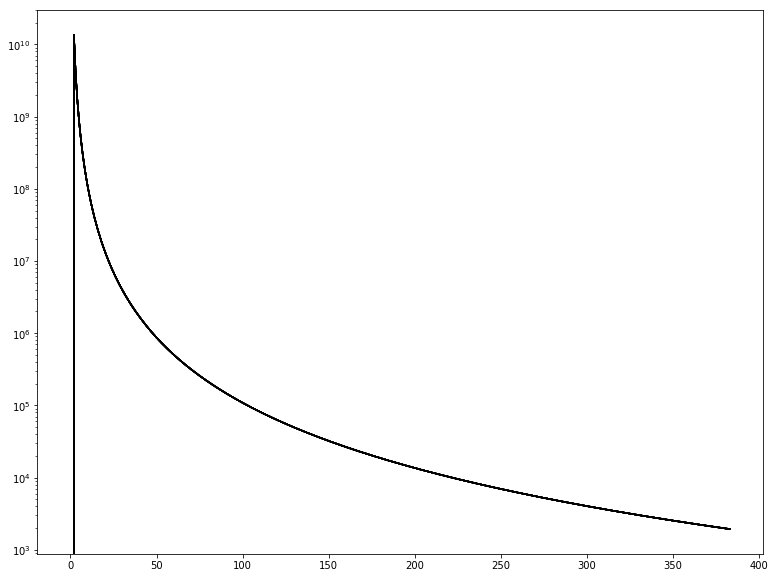

In [39]:
#test multiple realisations of the model to see how much it varies
start=time.time()
figure(figsize=(13,10))
for i in range(n):
    semilogy(ff.auto0x2(30e9), 'k',alpha=0.2)
print(time.time()-start)

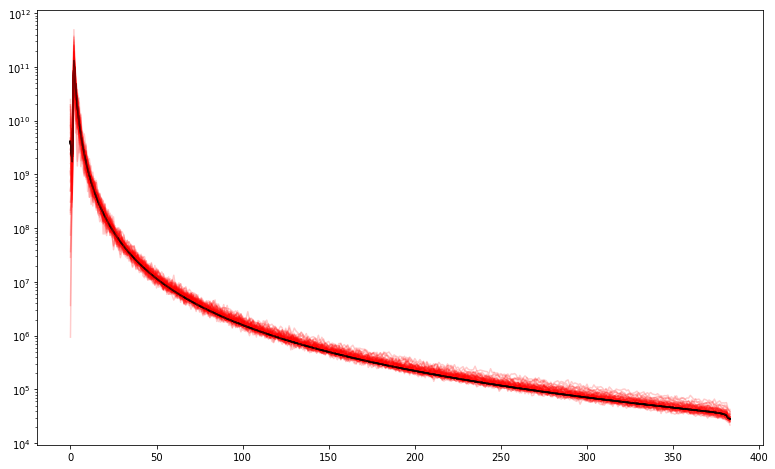

In [40]:
n=50
figure(figsize=(13,8))
mom0x0 = ff.auto0x0(30e9)
# anafast = hp.anafast(ff.map_full_power(30e9))
for i in range(n):
    anafast = hp.anafast(ff.map_full_power(30e9))
    mom1x1=ff.auto1x1(30e9)
    mom0x2=ff.auto0x2(30e9)
    model = mom0x0+mom1x1+mom0x2
    semilogy(model, 'k', alpha=0.2)
    semilogy(anafast,'r', alpha=0.2)

In [41]:
#nice! so model is now fixed. Check that the std of the beta maps isn't varying too much

In [42]:
big_std = np.zeros(50)

In [71]:
for i in range(50):
    bcls, beta_map = ff.map_power_beta()
    big_std[i] = np.std(beta_map)

In [72]:
np.std(big_std)

0.020668245033484887

In [51]:
#that seems okay...